In [1]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


In [2]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevyn,Kitty Litter,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-May


In [3]:
df['Delivered'] = True
df

,Name,Item Purchased,Cost,Date,Delivered
Store 1,Chris,Sponge,22.5,December 1,True
Store 1,Kevyn,Kitty Litter,2.5,January 1,True
Store 2,Filip,Spoon,5.0,mid-May,True


In [4]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Name,Item Purchased,Cost,Date,Delivered,Feedback
Store 1,Chris,Sponge,22.5,December 1,True,Positive
Store 1,Kevyn,Kitty Litter,2.5,January 1,True,None
Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [5]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [6]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [15]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)#Outer implies union of sets

,First Name_x,Last Name_x,Role,First Name_y,Last Name_y,School
0,Kelly,Desjardins,Director of HR,James,Hammond,Business
1,Sally,Brooks,Course liasion,Mike,Smith,Law
2,James,Wilde,Grader,Sally,Brooks,Engineering


In [8]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)#Inner is intersection

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [9]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)#left: use only keys from left frame

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [24]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)#right: use only keys from right frame

,level_0_x,index_x,First Name_x,Last Name_x,Role,level_0_y,index_y,First Name_y,Last Name_y,School
0,0,0,Kelly,Desjardins,Director of HR,0,0,James,Hammond,Business
1,1,1,Sally,Brooks,Course liasion,1,1,Mike,Smith,Law
2,2,2,James,Wilde,Grader,2,2,Sally,Brooks,Engineering


In [31]:
staff_df = staff_df.reset_index(drop=True)
student_df = student_df.reset_index(drop=True)
pd.merge(staff_df, student_df, how='left',left_on="First Name", right_on="First Name")
#left_on and right_on give column names on join the two fields by.

,First Name,Last Name_x,Role,Last Name_y,School
0,Kelly,Desjardins,Director of HR,NaN,NaN
1,Sally,Brooks,Course liasion,Brooks,Engineering
2,James,Wilde,Grader,Hammond,Business


In [12]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [29]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


Idiomatic Pandas: Making Code Pandorable

In [33]:
da=pd.read_csv('Happiness_index.csv')
da.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [34]:
(da.where(da['adjusted_satisfaction']>=50)
    .dropna()
    .set_index(['country'])
    .rename(columns={'region': 'Region'}))#an example of idioms. It makes the code easier to execute

,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,Region,happyScore,GDP,country.1
country,,,,,,,,,,
Argentina,60.0,7.1,1.91,7101.120000,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
Austria,59.0,7.2,2.11,19457.040000,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
Australia,65.0,7.6,1.80,19917.000000,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia
Belgium,63.0,7.2,1.72,17168.505000,15166.455000,28.745000,'Western Europe',6.937,1.30782,Belgium
Bolivia,53.0,6.3,1.90,3985.710000,2584.470000,51.610000,'Latin America and Caribbean',5.890,0.68133,Bolivia
Brazil,56.0,6.9,2.19,5567.235000,3294.180000,54.333750,'Latin America and Caribbean',6.983,0.98124,Brazil
Canada,69.0,8.0,1.71,20190.780000,16829.100000,33.790000,'North America',7.427,1.32629,Canada
Switzerland,70.0,8.0,1.62,23400.040000,19442.920000,32.930000,'Western Europe',7.587,1.39651,Switzerland
Chile,55.0,6.8,2.13,7557.990000,4448.010000,51.270000,'Latin America and Caribbean',6.670,1.10715,Chile


In [40]:
import numpy as np
def min_max(row):
    data = row[['adjusted_satisfaction',
                'avg_satisfaction',
                'std_satisfaction']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})
#Returns a two column series

In [41]:
da.apply(min_max, axis=1)

,min,max
0,2.42,37.0
1,3.19,26.0
2,1.91,60.0
3,2.11,59.0
4,1.80,65.0
...,...,...
106,2.13,58.0
107,1.77,53.0
108,2.47,49.0
109,2.61,37.0


In [44]:
def min_max(row):
    data = row[['adjusted_satisfaction',
                'avg_satisfaction',
                'std_satisfaction']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
#alter to above cell. Adds to the existing dataframe

In [47]:
da.apply(min_max, axis=1)#Apply a function along an axis of the DataFrame.

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1,max,min
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia,37.0,2.42
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola,26.0,3.19
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina,60.0,1.91
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria,59.0,2.11
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia,65.0,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay,58.0,2.13
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam,53.0,1.77
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa,49.0,2.47
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia,37.0,2.61


In [48]:
rows=['adjusted_satisfaction',
                'avg_satisfaction',
                'std_satisfaction']
da.apply(lambda x: np.max(x[rows]), axis=1)#applying the above using lambdas

0      37.0
1      26.0
2      60.0
3      59.0
4      65.0
       ... 
106    58.0
107    53.0
108    49.0
109    37.0
110    33.0
Length: 111, dtype: float64

GroupBy method in Pandas

In [1]:
import numpy as np
import pandas as pd

In [70]:
db=pd.read_excel('https://query.data.world/s/cqgsjhuv7c4uk7zjyag3d5kr7rmb2p',header=0, delim_whitespace=True)
db.head()

,Year,Western Champion,Eastern Champion,Result,NBA Champion,NBA Vice-Champion,Final Sweep ?,MVP Name,MVP Height (m),MVP Height (ft),MVP Position,MVP Team,MVP Nationality,MVP status
0,1950,Minneapolis Lakers,Syracuse Nationals,4–2,Minneapolis Lakers,Syracuse Nationals,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,Rochester Royals,New York Knicks,4–3,Rochester Royals,New York Knicks,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,Minneapolis Lakers,New York Knicks,4–3,Minneapolis Lakers,New York Knicks,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,Minneapolis Lakers,New York Knicks,4–1,Minneapolis Lakers,New York Knicks,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,Minneapolis Lakers,Syracuse Nationals,4–3,Minneapolis Lakers,Syracuse Nationals,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
for group, frame in db.groupby('NBA Champion'):
    arr=frame.iloc[0,0]
    print("NBA Champion:"+group+"\nYear of their first victory: "+str(arr))

NBA Champion:Boston Celtics
Year of their first victory: 1957
NBA Champion:Chicago Bulls
Year of their first victory: 1991
NBA Champion:Cleveland Cavaliers
Year of their first victory: 2016
NBA Champion:Dallas Mavericks
Year of their first victory: 2011
NBA Champion:Detroit Pistons
Year of their first victory: 1989
NBA Champion:Golden State Warriors
Year of their first victory: 1975
NBA Champion:Houston Rockets
Year of their first victory: 1994
NBA Champion:Los Angeles Lakers
Year of their first victory: 1972
NBA Champion:Miami Heat
Year of their first victory: 2006
NBA Champion:Milwaukee Bucks
Year of their first victory: 1971
NBA Champion:Minneapolis Lakers
Year of their first victory: 1950
NBA Champion:New York Knicks
Year of their first victory: 1970
NBA Champion:Philadelphia 76ers
Year of their first victory: 1967
NBA Champion:Philadelphia Warriors
Year of their first victory: 1956
NBA Champion:Portland Trail Blazers
Year of their first victory: 1977
NBA Champion:Rochester Royals


In [72]:
#db = db.set_index('STNAME')
db = db.set_index('Final Sweep ?')

def fun(item):
    if item==0:
        return 0
    elif item==1:
        return 1
    return 2

for group, frame in db.groupby(fun):
    print('There are ' + str(len(frame)) + ' number of ' + str(group))


There are 60 number of 0
There are 9 number of 1


In [75]:

db.groupby('NBA Champion').agg({'MVP Height (m)': np.average})

,MVP Height (m)
NBA Champion,
Boston Celtics,2.067647
Chicago Bulls,1.993333
Cleveland Cavaliers,1.910000
Dallas Mavericks,1.910000
Detroit Pistons,2.076667
Golden State Warriors,1.960000
Houston Rockets,2.145000
Los Angeles Lakers,2.063636
Miami Heat,1.990000


In [78]:
(db.set_index('NBA Champion').groupby(level=0)['MVP Height (m)']
    .agg({'avg': np.average, 'sum': np.sum}).dropna())

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,avg,sum
NBA Champion,,
Boston Celtics,2.067647,35.15
Chicago Bulls,1.993333,11.96
Cleveland Cavaliers,1.910000,1.91
Dallas Mavericks,1.910000,1.91
Detroit Pistons,2.076667,6.23
Golden State Warriors,1.960000,7.84
Houston Rockets,2.145000,4.29
Los Angeles Lakers,2.063636,22.70
Miami Heat,1.990000,5.97


In [79]:
(db.set_index('NBA Champion').groupby(level=0)['MVP Height (m)','MVP Height (ft)']
    .agg({'avg': np.average, 'sum': np.sum}).dropna())

C:\Users\tejas\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


avg                            sum  \
                       MVP Height (m) MVP Height (ft) MVP Height (m)   
NBA Champion                                                           
Boston Celtics               2.067647        6.783619          35.15   
Chicago Bulls                1.993333        6.539808          11.96   
Cleveland Cavaliers          1.910000        6.266404           1.91   
Dallas Mavericks             1.910000        6.266404           1.91   
Detroit Pistons              2.076667        6.813211           6.23   
Golden State Warriors        1.960000        6.447835           7.84   
Houston Rockets              2.145000        7.037402           4.29   
Los Angeles Lakers           2.063636        6.770461          22.70   
Miami Heat                   1.990000        6.528872           5.97   
Milwaukee Bucks              2.180000        7.152231           2.18   
New York Knicks              2.060000        6.758530           4.12   
Philadelphia 76ers           2.120000        6.955381           4.24   
Philadelphia Warriors        2.060000        6.758530           2.06   
Portland Trail Blazers       2.180000        7.152231           2.18   
San Antonio Spurs            2.054000        6.738845          10.27   
Seattle SuperSonics          2.080000        6.824147           2.08   
St. Louis Hawks              2.080000        6.824147           2.08   
Washington Bullets           2.110000        6.922572           2.11   

                                        
                       MVP Height (ft)  
NBA Champion                            
Boston Celtics              115.321526  
Chicago Bulls                39.238846  
Cleveland Cavaliers           6.266404  
Dallas Mavericks              6.266404  
Detroit Pistons              20.439633  
Golden State Warriors        25.791339  
Houston Rockets              14.074804  
Los Angeles Lakers           74.475068  
Miami Heat                   19.586615  
Milwaukee Bucks               7.152231  
New York Knicks              13.517061  
Philadelphia 76ers           13.910762  
Philadelphia Warriors         6.758530  
Portland Trail Blazers        7.152231  
San Antonio Spurs            33.694227  
Seattle SuperSonics           6.824147  
St. Louis Hawks               6.824147  
Washington Bullets            6.922572

Scaling

In [85]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [81]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [93]:
grades = df['Grades'].astype('category')#The code given for this part in the course doesnt work for this version pf python
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [97]:
import pandas as pd
dx = pd.read_csv('cars.csv',encoding= 'unicode_escape')

In [99]:
dx.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.2,7.0,8.8,32,202
2,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.6,7.0,8.4,34,193
3,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,9.4,7.0,8.3,34,191
4,1995,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,12.6,8.9,10.9,26,251


In [ ]:
dx.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)
dx.pivot_table( values='(kW)',index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

# Date Functionality in Pandas

In [107]:
import pandas as pd
import numpy as np

In [108]:
pd.Timestamp('9/1/2016 10:05AM')#Timestamp

Timestamp('2016-09-01 10:05:00')

In [110]:
pd.Period('1/2016')
pd.Period('3/5/2016')
#Period

Period('2016-03-05', 'D')

In [119]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1
type(t1.index)
#DatetimeIndex

pandas.core.indexes.datetimes.DatetimeIndex

In [118]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2
type(t2.index)
#PeriodIndex

pandas.core.indexes.period.PeriodIndex

In [120]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3#Converting to datetime

,a,b
2 June 2013,32,56
"Aug 29, 2014",55,41
2015-06-26,52,80
7/12/16,35,23


In [121]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,32,56
2014-08-29,55,41
2015-06-26,52,80
2016-07-12,35,23


In [122]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

In [127]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')#Time delta
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')#Summing times

Timestamp('2016-09-14 11:10:00')

In [128]:
#Working with Dates in a Dataframe
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [129]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,108,129
2016-10-16,110,129
2016-10-30,111,127
2016-11-13,112,122
2016-11-27,107,120
2016-12-11,110,128
2016-12-25,109,121
2017-01-08,105,122
2017-01-22,105,123


In [130]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [131]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,2.0,0.0
2016-10-30,1.0,-2.0
2016-11-13,1.0,-5.0
2016-11-27,-5.0,-2.0
2016-12-11,3.0,8.0
2016-12-25,-1.0,-7.0
2017-01-08,-4.0,1.0
2017-01-22,0.0,1.0


In [132]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,109.666667,128.333333
2016-11-30,109.500000,121.000000
2016-12-31,109.500000,124.500000
2017-01-31,105.000000,122.500000


In [136]:
df['2017']
df['2016-12']
df['2016-12':]

,Count 1,Count 2
2016-12-11,110,128
2016-12-25,109,121
2017-01-08,105,122
2017-01-22,105,123


In [134]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,108,129
2016-10-09,108,129
2016-10-16,110,129
2016-10-23,110,129
2016-10-30,111,127
2016-11-06,111,127
2016-11-13,112,122
2016-11-20,112,122
2016-11-27,107,120
2016-12-04,107,120


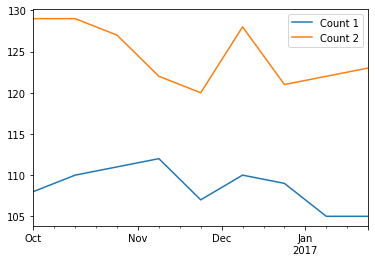

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()